In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import warnings; warnings.simplefilter('ignore')
from scipy.spatial import ConvexHull
import matplotlib.pyplot as plt 
from matplotlib import patches
%matplotlib inline

In [2]:
midwest = pd.read_csv('midwest_filter.csv')
midwest.head()

,PID,county,state,area,poptotal,popdensity,popwhite,popblack,popamerindian,popasian,...,percprof,poppovertyknown,percpovertyknown,percbelowpoverty,percchildbelowpovert,percadultpoverty,percelderlypoverty,inmetro,category,dot_size
0,561,ADAMS,IL,0.052,66090,1270.961540,63917,1702,98,249,...,4.355859,63628,96.274777,13.151443,18.011717,11.009776,12.443812,0,AAR,250.944411
1,562,ALEXANDER,IL,0.014,10626,759.000000,7054,3496,19,48,...,2.870315,10529,99.087145,32.244278,45.826514,27.385647,25.228976,0,LHR,185.781260
2,563,BOND,IL,0.022,14991,681.409091,14477,429,35,16,...,4.488572,14235,94.956974,12.068844,14.036061,10.852090,12.697410,0,AAR,175.905385
3,564,BOONE,IL,0.017,30806,1812.117650,29344,127,46,150,...,4.197800,30337,98.477569,7.209019,11.179536,5.536013,6.217047,1,ALU,319.823487
4,565,BROWN,IL,0.018,5836,324.222222,5264,547,14,5,...,3.367680,4815,82.505140,13.520249,13.022889,11.143211,19.200000,0,AAR,130.442161


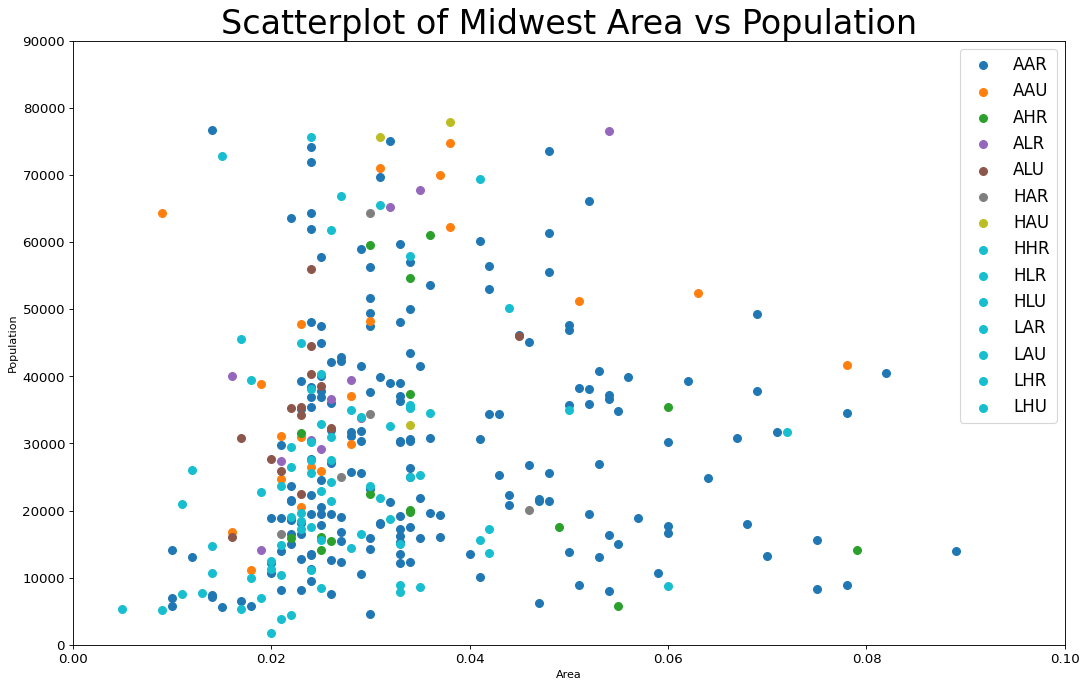

In [3]:
#1. Scatter plot
categories = np.unique(midwest['category']).tolist()
colors = [plt.cm.tab10(i/float(len('category')-1)) for i in range(len(categories))]

fig = plt.figure(figsize=(16,10), dpi=80, facecolor='w', edgecolor='k')

for i, category  in enumerate(categories):
    plt.scatter( 'area', 'poptotal',data=midwest.loc[midwest.category==category,:], s=50, color= colors[i], label=str(category))
    
plt.gca().set(xlim=(0.0, 0.1), ylim=(0, 90000), xlabel="Area", ylabel="Population")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Scatterplot of Midwest Area vs Population", fontsize=30)
plt.legend(fontsize=15)
plt.show()

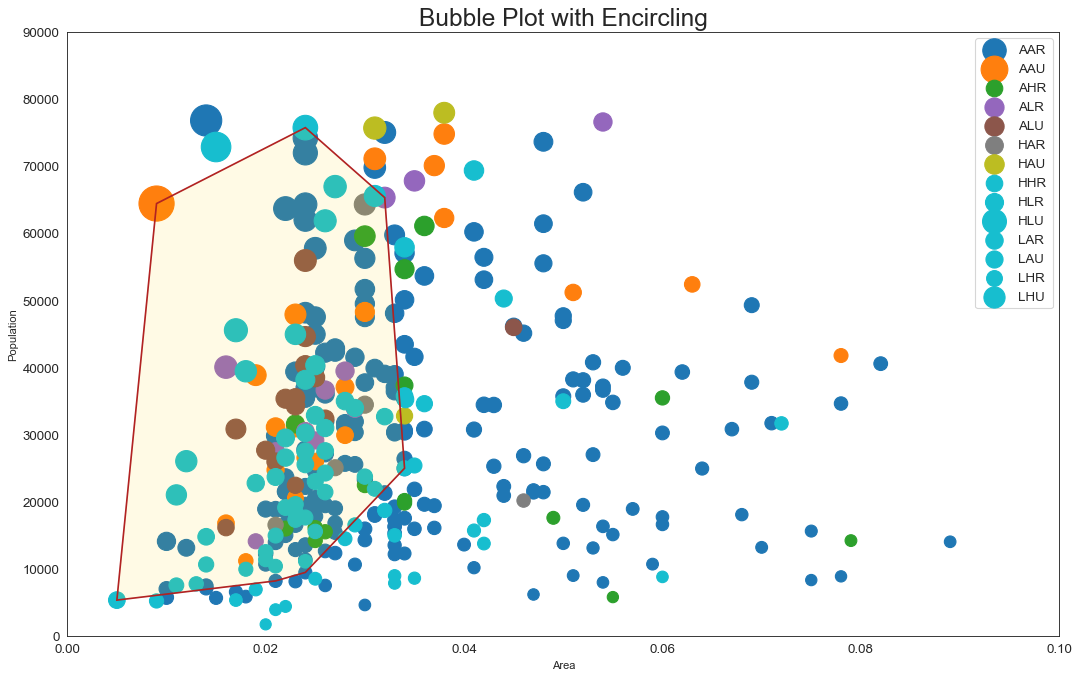

In [10]:
#2. Bubble plot with Encircling 
sns.set_style("white")

#Prepare Data
categories = np.unique(midwest['category'])
colors = [plt.cm.tab10(i/float(len('category')-1)) for i in range(len(categories))]

# Step 2: Draw Scatterplot with unique color for each category
fig = plt.figure(figsize=(16,10), dpi=80, facecolor='w', edgecolor='k')
for i, category in enumerate(categories):
    plt.scatter('area','poptotal', data= midwest.loc[midwest.category == category,:], s='dot_size', color=colors[i], linewidth=1, label=str(category))

#Encircling
def encircle(x,y,ax=None, **kw):
    if not ax: 
        ax=plt.gca()
        p = np.c_[x,y]
        hull = ConvexHull(p)
        poly = plt.Polygon(p[hull.vertices,:],**kw)
        ax.add_patch(poly)
#Select data to be encircled 
midwest_encircle_data = midwest.loc[midwest.state == 'IN',:]
#Draw polygon surrounding vertices 
encircle(midwest_encircle_data.area, midwest_encircle_data.poptotal, ec="k", fc="gold", alpha=0.1)
encircle(midwest_encircle_data.area, midwest_encircle_data.poptotal, ec="firebrick", fc="none", linewidth=1.5) 
         
#Decorations    
plt.gca().set(xlim=(0.0, 0.1), ylim=(0,90000), xlabel="Area",ylabel="Population")
plt.title("Bubble Plot with Encircling", fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12) 
plt.show()
